In [49]:
import pandas as pd
import matplotlib.pyplot as plt


In [50]:
data=pd.read_csv('USArrests.csv')
data.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [51]:
data.index


RangeIndex(start=0, stop=50, step=1)

In [52]:
data.index=data.iloc[:, 0]
data.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [53]:
data.index=data.iloc[:, 0]
data.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [54]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [55]:
data=data.iloc[:, 1:5]
data.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [56]:
data.index.name=None
data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [57]:
data.isnull().sum()

,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 4.0+ KB


In [59]:
Murder=data['Murder']
Murder.info()

<class 'pandas.core.series.Series'>
Index: 50 entries, Alabama to Wyoming
Series name: Murder
Non-Null Count  Dtype  
--------------  -----  
50 non-null     float64
dtypes: float64(1)
memory usage: 2.8+ KB


In [63]:
Assault=data['Assault']
Assault.info()

<class 'pandas.core.series.Series'>
Index: 50 entries, Alabama to Wyoming
Series name: Assault
Non-Null Count  Dtype
--------------  -----
50 non-null     int64
dtypes: int64(1)
memory usage: 2.8+ KB


In [61]:
UrbanPop=data['UrbanPop']
UrbanPop.info()

<class 'pandas.core.series.Series'>
Index: 50 entries, Alabama to Wyoming
Series name: UrbanPop
Non-Null Count  Dtype
--------------  -----
50 non-null     int64
dtypes: int64(1)
memory usage: 2.8+ KB


In [62]:
Rape=data['Rape']
Rape.info()

<class 'pandas.core.series.Series'>
Index: 50 entries, Alabama to Wyoming
Series name: Rape
Non-Null Count  Dtype  
--------------  -----  
50 non-null     float64
dtypes: float64(1)
memory usage: 2.8+ KB


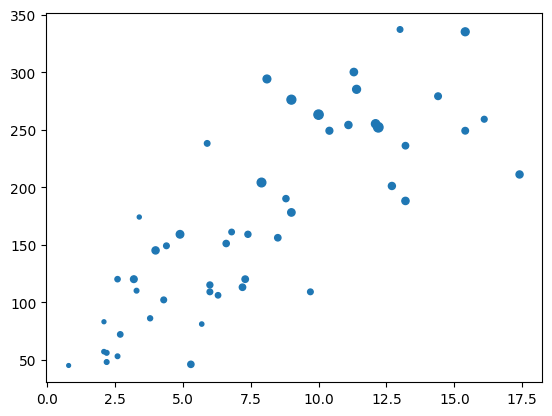

In [64]:
plt.scatter('Murder','Assault','Rape',data=data)
plt.show()

In [67]:
from sklearn.cluster import KMeans
k_score_list=[]
for x in range (1,15):
  kmeans=KMeans(n_clusters=x)
  kmeans.fit(data)
  k_score_list.append(kmeans.inertia_)

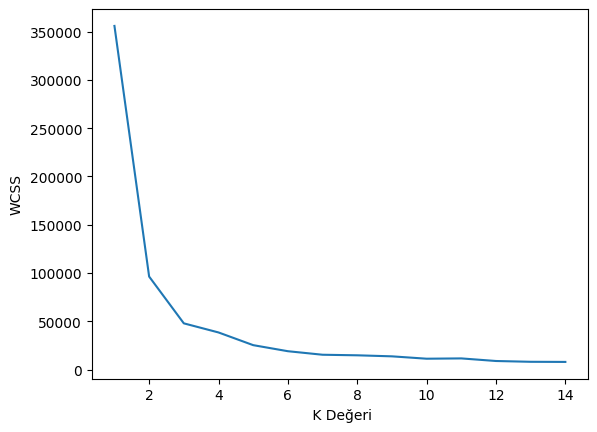

In [68]:
plt.plot(range(1,15),k_score_list)
plt.xlabel(" K Değeri")
plt.ylabel("WCSS")
plt.show()

In [70]:
kmeans1=KMeans(n_clusters=3)
clusters=kmeans1.fit_predict(data)

In [71]:
clusters

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1,
       2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [72]:
data["label"]=clusters
data.head()

,Murder,Assault,UrbanPop,Rape,label
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1


In [76]:
from mpl_toolkits.mplot3d import Axes3D

kmeans1=KMeans(n_clusters=3)
model=kmeans1.fit(data)
clusters=model.labels_
merkez=kmeans.cluster_centers_

In [80]:
plt.rcParams['figure.figsize']=(16,9)
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(data.iloc[:,0],data.iloc[:,1],data.iloc[:,2])

<Figure size 1600x900 with 0 Axes>

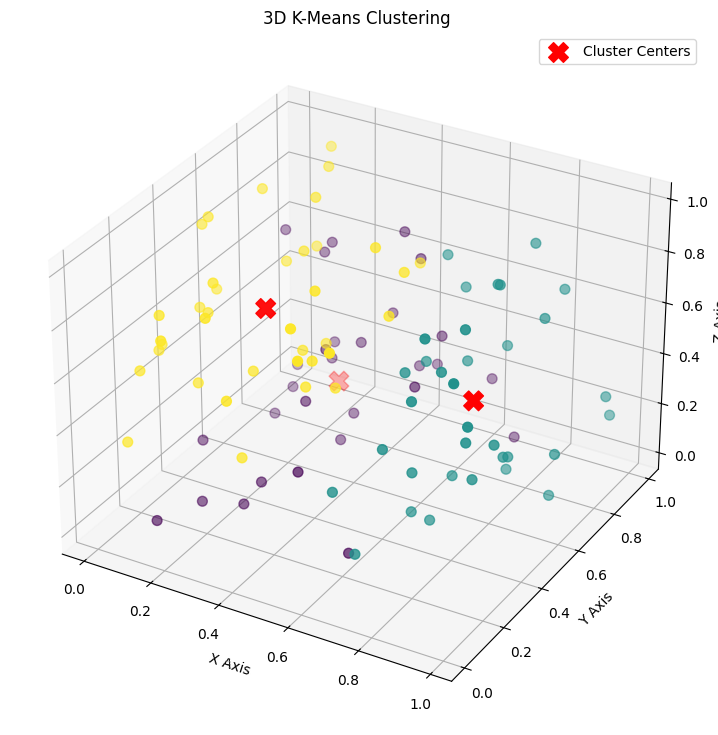

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# K-Means kümeleme
kmeans1 = KMeans(n_clusters=3)
model = kmeans1.fit(data)
clusters = model.labels_
centroids = kmeans1.cluster_centers_

# Grafik oluştur
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Veri noktalarını çiz
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2],
           c=clusters, cmap='viridis', s=50)

# Küme merkezlerini çiz
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
           c='red', s=200, marker='X', label='Cluster Centers')

# Eksen etiketleri
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Başlık ve gösterim
ax.set_title('3D K-Means Clustering')
plt.legend()
plt.show()


In [86]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(data.iloc[:,0],data.iloc[:,1],data.iloc[:,2], c=clusters)
ax.scatter(merkez[:,0],merkez[:,1],merkez[:,2],c='red')

<Figure size 1600x900 with 0 Axes>